# Prédire le vendeur

## Contexte

Le client a différent vendeur. Avoir un moyen de prédire le vendeur
le plus proche ou le moins chère peut optimiser les décisions du client.

## Visualisation des données

In [2]:
import pandas as pd
import yaml
import seaborn as sns
import matplotlib.pyplot as plt

with open('../params/configs/data_path.yaml', 'r') as fp:
	data_path = yaml.load(fp)
seller = pd.read_csv(data_path['olist_sellers_dataset'])
geolocation = pd.read_csv(data_path['olist_geolocation_dataset'])
customers = pd.read_csv(data_path['olist_customers_dataset'])
df= seller

<ipython-input-2-de43dbc2d26a>:7: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data_path = yaml.load(fp)


In [3]:
df

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [5]:
#Cette fonction donne l'entrepôt le plus proche du client
def nearStorage(zip_code,city): #La fonction prends deux arguments, le zip_code qui est le zip code de la commande, et la city qui est la ville où la commande est passé
    compteur = 0 #le compteur qui est utilisé pour atteindre la ligne que l'on souhaite dans le dataframe
    for i in df['seller_zip_code_prefix'] :
        if(i == zip_code):
            return df.iloc[compteur] #si on trouve un zip_code correspondant, alors, on renvoie la ligne de la dataframe correspondante
        else :
            compteur+=1;
    tempo = []
    compteur =0
    for i in df['seller_city']: #Si nous n'avons pas trouvé de zip_code correspondant alors
        if(i == city):        
            tempo.append(df.iloc[compteur]['seller_id']) # on prends tout les entrepôts de la ville recherché. 
            compteur+=1;
        else:
            compteur+=1;
    if(tempo==[]):return "Aucun entrepôt à proximité" #Si aucune entrepôt n'a été trouvé alors on renvoie ce message
    return tempo #Sinon on renvoie un tableau d'id d'entrepôt. Avec les id d'entrepôt on pourrais, par exemple, envoyer les produit dans l'entrepôt le moins surchargé.
fonction(4650,'sao paulo')

seller_id                 74871d19219c7d518d0090283e03c137
seller_zip_code_prefix                                4650
seller_city                                      sao paulo
seller_state                                            SP
Name: 3092, dtype: object

Avec cette fonction, nous pouvons donc déduire l'entrepôt ou les entrepôt le(s) plus proches de la destination d'une commande. Cela permettra une meilleure gestion des stock et que les clients soit livrés plus rapidement.

### Éfficacité de l'algorythme


In [14]:
pdf = customers
list=[]
for i in df['seller_city'].value_counts().index:
    list.append(pdf['customer_city'].str.contains(i).any())



On stocke dans une liste, si l'entrepôt est contenu dans une vile où un client est présent

In [9]:
df2 = pd.DataFrame(df['seller_city'].value_counts().index)
df2['present'] = list

<AxesSubplot:title={'center':"Graphe montrant le poucentage de clients qui habitent dans des villes avec des entrepôt de l'entreprise"}>

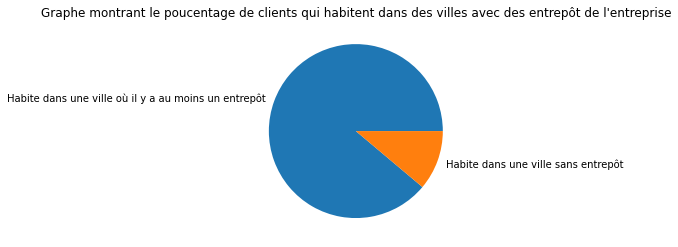

In [18]:
df2['present'].value_counts().plot.pie(title="Graphe montrant le poucentage de clients qui habitent dans des villes avec des entrepôt de l'entreprise",label ='', labels=['Habite dans une ville où il y a au moins un entrepôt','Habite dans une ville sans entrepôt'])

On représente la présence des entrepôt là où les clients sont. On peut donc voir qu'en majorité, les clients ont un entrepôt proche. Cela représente aussi l'efficacité de notre algorythme plus haut.

In [19]:
df2['present'].value_counts()[1]*100/ (df2['present'].value_counts()[0] + df2['present'].value_counts()[1])

88.87070376432078

In [20]:
df2['present'].value_counts()[0]*100/ (df2['present'].value_counts()[0] + df2['present'].value_counts()[1])

11.129296235679215

Donc dans 88,9% des cas notre algorythme renverra un entrepôt ou une liste d'entrepôt et dans 11,1% des cas l'algorythme de ne renverra rien et il faudra dronc faire un calcul de vecteur pour déterminer l'entrepôt le plus proche du client

## Conclusion

En conclusion, notre algorythme est assez performant pour permettre une bonne efficacité. En l'améliorant nous pourrons avoir une efficacité de 100% et donc de gérer parfaitement les entrepôt.